# Tensorflow Input Pipeline | tf Dataset

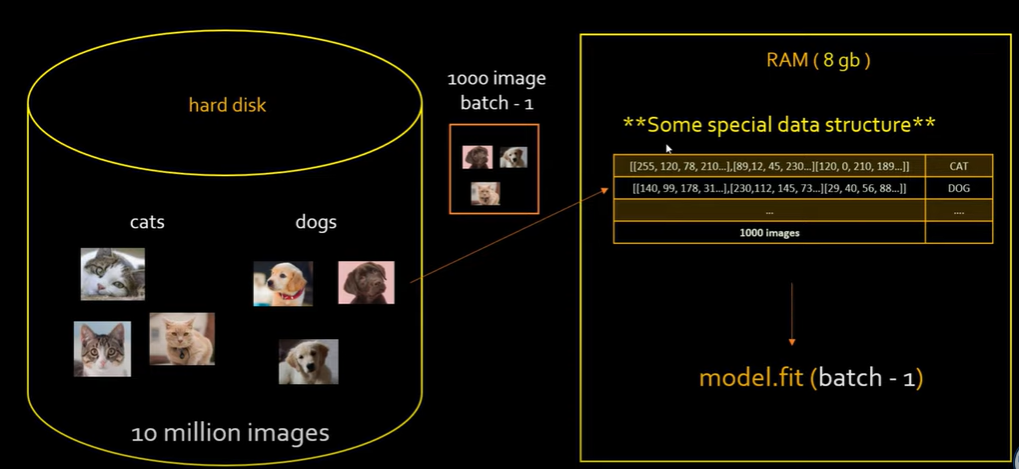

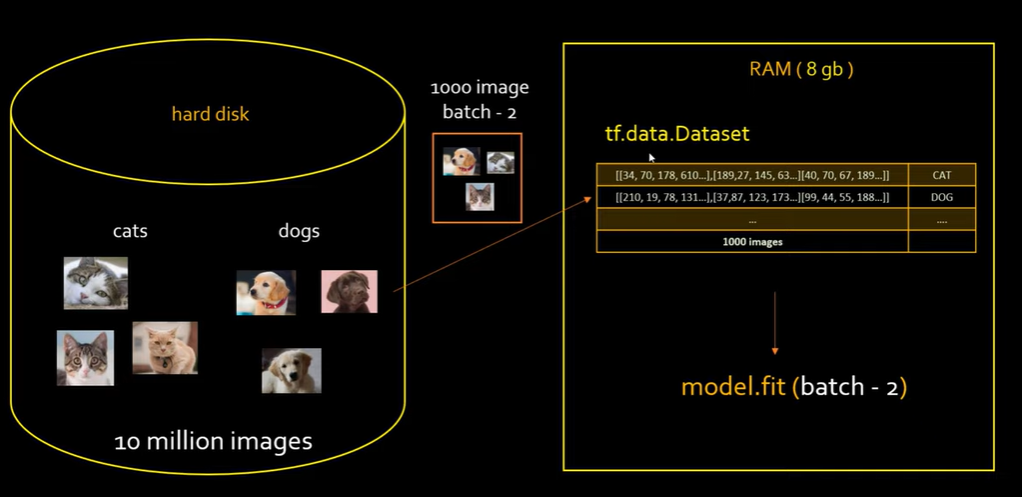

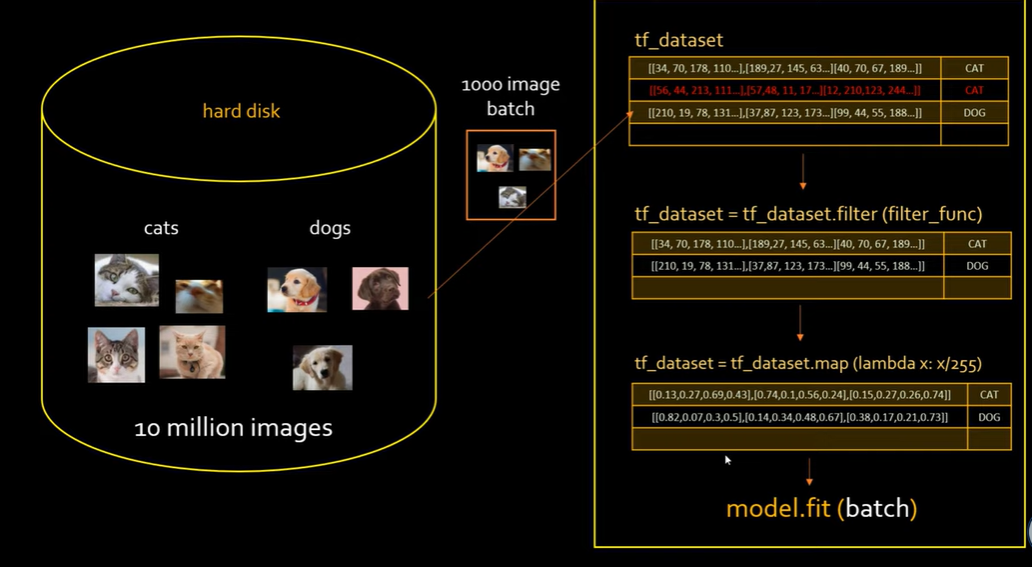

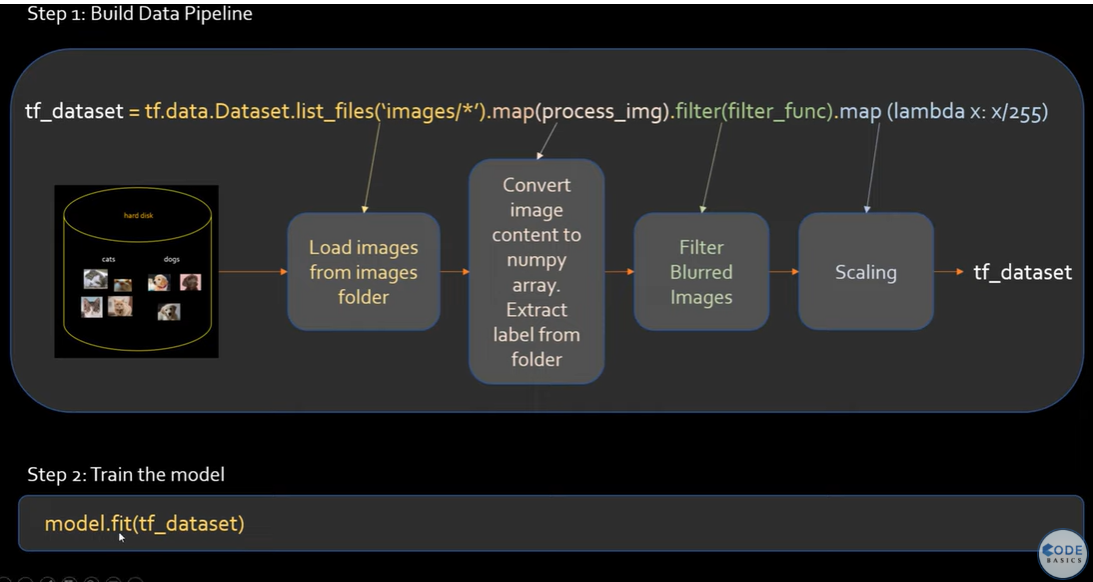

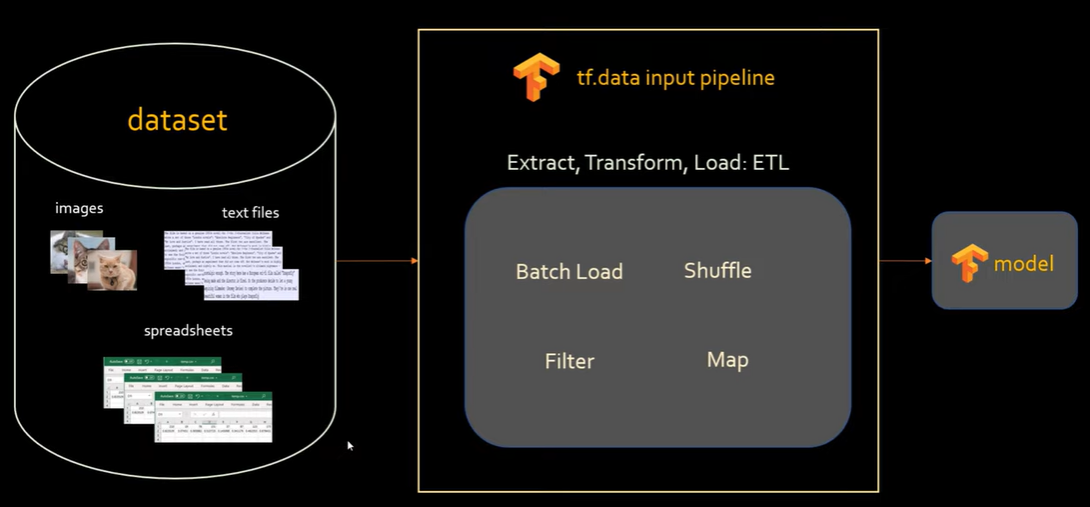

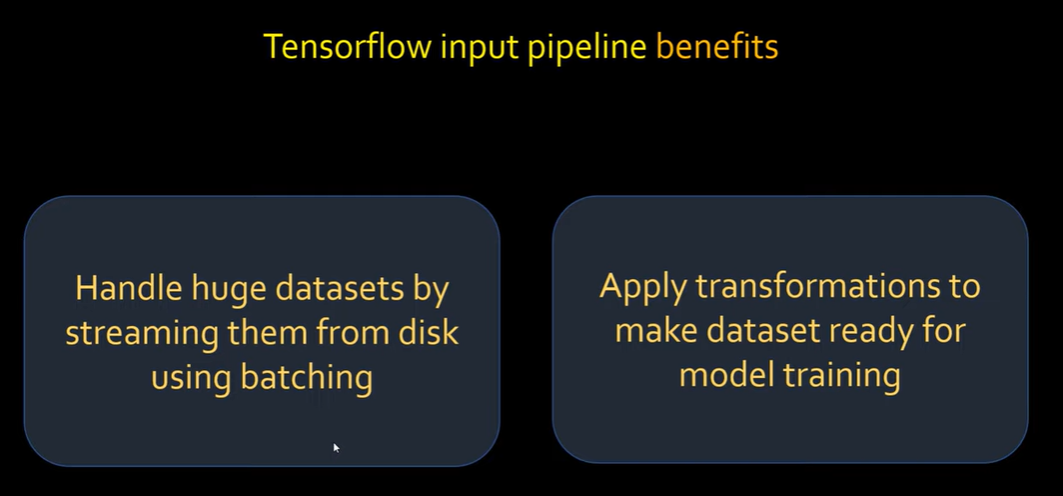

In [ ]:
import tensorflow as tf

<h3 style='color:purple'>Create tf dataset from a list</h3>

In [ ]:
daily_sales_numbers = [21, 22, -108, 31, -1, 32, 34,31]

tf_dataset = tf.data.Dataset.from_tensor_slices(daily_sales_numbers)
tf_dataset

<TensorSliceDataset shapes: (), types: tf.int32>

<h3 style='color:purple'>Iterate through tf dataset</h3>

In [ ]:
for sales in tf_dataset:
    print(sales.numpy())

21
22
-108
31
-1
32
34
31


<h3 style='color:purple'>Iterate through elements as numpy elements</h3>

In [ ]:
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

21
22
-108
31
-1
32
34
31


<h3 style='color:purple'>Iterate through first n elements in tf dataset</h3>

In [ ]:
for sales in tf_dataset.take(3):
    print(sales.numpy())

21
22
-108


<h3 style='color:purple'>Filter sales numbers that are < 0</h3>

In [ ]:
tf_dataset = tf_dataset.filter(lambda x: x>0)
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

21
22
31
32
34
31


<h3 style='color:purple'>Convert sales numbers from USA dollars ($) to Indian Rupees (INR) Assuming 1->72 conversation rate</h3>

In [ ]:
tf_dataset = tf_dataset.map(lambda x: x*72)
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

1512
1584
2232
2304
2448
2232


<h3 style='color:purple'>Shuffe</h3>

In [ ]:
tf_dataset = tf_dataset.shuffle(2)
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

1512
2232
2304
2448
2232
1584


https://stackoverflow.com/questions/53514495/what-does-batch-repeat-and-shuffle-do-with-tensorflow-dataset

<h3 style='color:purple'>Batching</h3>

In [ ]:
for sales_batch in tf_dataset.batch(2):
    print(sales_batch.numpy())

[1584 2232]
[2304 2448]
[2232 1512]


<h3 style='color:purple'>Perform all of the above operations in one shot</h3>

In [ ]:
tf_dataset = tf.data.Dataset.from_tensor_slices(daily_sales_numbers)

tf_dataset = tf_dataset.filter(lambda x: x>0).map(lambda y: y*72).shuffle(2).batch(2)
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

[1512 2232]
[1584 2448]
[2304 2232]


<h3>Images</h3>

In [ ]:
images_ds = tf.data.Dataset.list_files('images/*/*', shuffle=False)

In [ ]:
image_count = len(images_ds)
image_count

130

In [ ]:
type(images_ds)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [ ]:
for file in images_ds.take(3):
    print(file.numpy())

b'images\\cat\\20 Reasons Why Cats Make the Best Pets....jpg'
b'images\\cat\\7 Foods Your Cat Can_t Eat.jpg'
b'images\\cat\\A cat appears to have caught the....jpg'


In [ ]:
images_ds = images_ds.shuffle(200)
for file in images_ds.take(3):
    print(file.numpy())

b'images\\dog\\The US Army is testing augmented....jpg'
b'images\\dog\\Subaru Shows Love for Dogs Through the....jpg'
b'images\\cat\\Reality check_ Can cat poop cause....jpg'


In [ ]:
class_names = ["cat","dog"]

In [ ]:
train_size = int(image_count*0.8)
train_ds = images_ds.take(train_size)
test_ds = images_ds.skip(train_size)

In [ ]:
len(train_ds)

104

In [ ]:
len(test_ds)

26

In [ ]:
def get_label(file_path):
    import os
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2]

In [ ]:
get_label("images\\dog\\20 Reasons Why Cats Make the Best Pets....jpg")

<tf.Tensor: shape=(), dtype=string, numpy=b'dog'>

In [ ]:
def process_image(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path) # load the raw data from the file as a string
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [128, 128])
    return img, label

In [ ]:
img, label = process_image("images\\cat\\20 Reasons Why Cats Make the Best Pets....jpg")
img.numpy()[:2]

array([[[155.      , 186.      , 215.      ],
        [156.      , 187.      , 216.      ],
        [158.      , 189.      , 218.      ],
        [160.0039  , 189.0039  , 219.0039  ],
        [161.0039  , 190.0039  , 220.0039  ],
        [162.      , 191.      , 221.      ],
        [166.      , 193.      , 222.      ],
        [167.      , 194.      , 223.      ],
        [168.      , 195.      , 224.      ],
        [169.      , 196.      , 225.      ],
        [170.      , 197.      , 224.      ],
        [170.0039  , 197.0039  , 224.0039  ],
        [172.      , 199.      , 226.      ],
        [173.0039  , 199.0039  , 224.0039  ],
        [174.0039  , 200.0039  , 225.0039  ],
        [175.0039  , 201.0039  , 226.0039  ],
        [176.      , 202.      , 227.      ],
        [177.0039  , 203.0039  , 228.0039  ],
        [177.0039  , 203.0039  , 228.0039  ],
        [179.0039  , 203.0039  , 227.0039  ],
        [180.0039  , 204.0039  , 228.0039  ],
        [180.0039  , 204.0039  , 2

In [ ]:
train_ds = train_ds.map(process_image)
test_ds = test_ds.map(process_image)

In [ ]:
for image, label in train_ds.take(1):
    print("****",image)
    print("****",label)

**** tf.Tensor(
[[[ 29.873047   38.558594   42.558594 ]
  [ 39.064453   44.21875    49.67578  ]
  [ 37.009766   45.01953    51.259766 ]
  ...
  [ 45.779297   23.298828    3.0097656]
  [ 46.509766   22.773438    3.96875  ]
  [ 45.439453   20.470703    3.15625  ]]

 [[ 38.34375    45.10547    50.34375  ]
  [ 41.353516   47.35742    54.916016 ]
  [ 41.65625    52.347656   60.9375   ]
  ...
  [ 47.820312   23.878906    2.9414062]
  [ 46.86914    21.789062    2.9335938]
  [ 44.648438   20.861328    2.8125   ]]

 [[ 45.498047   52.89453    59.041016 ]
  [ 48.070312   55.191406   63.191406 ]
  [ 51.035156   58.746094   64.85742  ]
  ...
  [ 49.72461    24.107422    4.732422 ]
  [ 48.439453   24.001953    3.       ]
  [ 47.716797   23.259766    3.0722656]]

 ...

 [[107.46094    75.94922    39.396484 ]
  [106.0293     75.6582     41.5625   ]
  [106.25       76.85742    43.61133  ]
  ...
  [101.078125   64.11328    26.050781 ]
  [102.02539    66.02539    24.90039  ]
  [ 97.71875    64.00195    

In [ ]:
def scale(image, label):
    return image/255, label

In [ ]:
train_ds = train_ds.map(scale)

In [ ]:
for image, label in train_ds.take(5):
    print("****Image: ",image.numpy()[0][0])
    print("****Label: ",label.numpy())

****Image:  [0.10965074 0.1645527  0.03097427]
****Label:  b'dog'
****Image:  [0.60398287 0.6628064  0.6510417 ]
****Label:  b'dog'
****Image:  [0.14935039 0.19651932 0.14156231]
****Label:  b'cat'
****Image:  [0.8718137  0.91495097 0.9227941 ]
****Label:  b'dog'
****Image:  [0.9059021  0.9137452  0.85884327]
****Label:  b'dog'
